In [1]:
import numpy as np

areas  = np.array([6.7, 4.6, 3.5, 5.5])
prices = np.array([9.1, 5.9, 4.6, 6.7])

In [2]:
print(areas)

[6.7 4.6 3.5 5.5]


In [3]:
A = np.vstack([areas, np.ones(len(areas))]).T
print(A)

[[6.7 1. ]
 [4.6 1. ]
 [3.5 1. ]
 [5.5 1. ]]


In [4]:
data = np.linalg.lstsq(A, prices, rcond=None)[0]
print(data)

[ 1.37268204 -0.39136137]


In [8]:
import numpy as np

# data
x = np.array([6.7, 4.6, 3.5, 5.5])
y = np.array([9.1, 5.9, 4.6, 6.7])

# create A = [x 1]
A = np.vstack([x, np.ones(len(x))]).T

# compute least square
w, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(w, b)

# compute y_hat
y_hat = x*w + b
print(y_hat)

1.3726820443238348 -0.39136137494346307
[8.80560832 5.92297603 4.41302578 7.15838987]


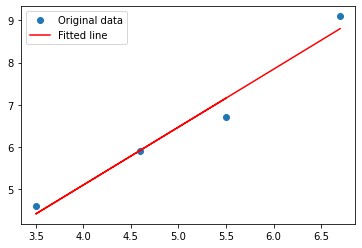

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, w*x + b, 'r', label='Fitted line')
plt.legend()
plt.show()

In [10]:
x = y = np.arange(-3.0, 3.0, 0.05)
print(x.shape)

(120,)


In [11]:
# demo error
w = b = np.arange(-1.0, 1.0, 0.3)
W, B = np.meshgrid(w, b)
print(W)
print(W.shape)

W = W.reshape(7, 7, 1)
W_tile = np.tile(W, 4)
print(W_tile.shape)


B = B.reshape(7, 7, 1)
B_tile = np.tile(B, 4)
print(B_tile.shape)

[[-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]
 [-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]]
(7, 7)
(7, 7, 4)
(7, 7, 4)


In [12]:
data_x = np.array([6.7, 4.6, 3.5, 5.5]).reshape(1, 1, 4)
data_y = np.array([9.1, 5.9, 4.6, 6.7]).reshape(1, 1, 4)

print(data_x.shape)
print(data_y.shape)

(1, 1, 4)
(1, 1, 4)


In [13]:
y_hat = W_tile*data_x + B_tile
print(y_hat.shape)

error = np.abs(y_hat - data_y)
print(error.shape)

error = np.sum(error, axis=2)
print(error.shape)

(7, 7, 4)
(7, 7, 4)
(7, 7)


(14400, 4)
(14400, 4)
(14400,)


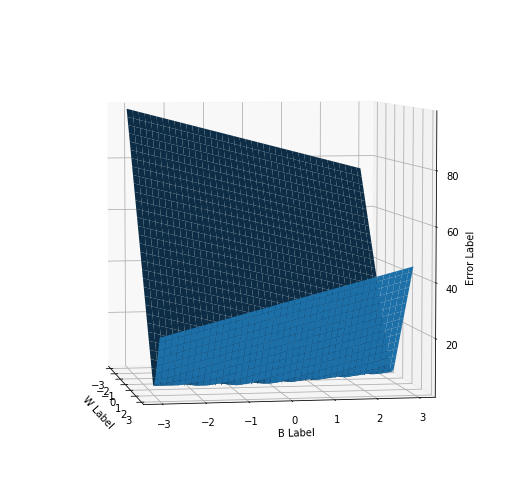

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

data_x = np.array([6.7, 4.6, 3.5, 5.5]).reshape(1, 4)
data_y = np.array([9.1, 5.9, 4.6, 6.7]).reshape(1, 4)

def fun(w, b):    
    w = w.reshape(14400, 1)
    w_tile = np.tile(w, 4)

    b = b.reshape(14400, 1)
    b_tile = np.tile(b, 4)
    
    print(w_tile.shape)
    print(b_tile.shape)

    y_hat = w_tile*data_x + b_tile
    error = np.abs(y_hat - data_y)    
    error = np.sum(error, axis=1)
    print(error.shape)
    
    return error

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=5., azim=-10)

x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('W Label')
ax.set_ylabel('B Label')
ax.set_zlabel('Error Label')

plt.show()